---
title: Carbon Dioxide and Methane Concentrations from the Northeast Corridor (NEC) Urban Test Bed
description: Atmospheric concentrations of carbon dioxide (CO₂) and methane (CH₄) collected at NIST Urban Test Bed tower sites in the Northeastern U.S.
author: Siddharth Chaudhary, Paridhi Parajuli
date: 12 September 2024
execute:
   freeze: true
---

## Approach

1. Identify available dates and temporal frequency of observations for the given data. The collection processed in this notebook is the Atmospheric concentrations of carbon dioxide (CO₂) and methane (CH₄) collected at NIST Urban Test Bed tower sites in the Northeastern U.S.
2. Visualize the time series data

   

## About the Data

NIST is engaged in research to improve measurement of greenhouse gas emissions in areas containing multiple emission sources and sinks, such as UNYies. NIST's objective is to develop measurement tools supporting independent means to increase the accuracy of greenhouse gas emissions data at urban and regional geospatial scales. NIST has established three test beds in U.S. UNYies to develop and evaluate the performance of advanced measurement capabilities for emissions independent of their origin. Located in Indianapolis, Indiana, the Los Angeles air basin of California, and the U.S. Northeast corridor (beginning with the Baltimore/Washington D.C. region), the test beds have been selected for their varying meteorology, terrain and emissions characteristics. These test beds will serve as a means to independently diagnose the accuracy of emissions data obtained directly from emission or uptake sources.

For more information regarding this dataset, please visit the [Carbon Dioxide and Methane Concentrations from the Northeast Corridor (NEC) Urban Test Bed](https://earth.gov/ghgcenter/data-catalog/nec-testbed-ghg-concentrations) data overview page.

# Install the Required Libraries
Required libraries are pre-installed on the GHG Center Hub. If you need to run this notebook elsewhere, please install them with this line in a code cell:

%pip install requests folium rasterstats pystac_client pandas matplotlib --quiet

### Importing required libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from io import StringIO

## Querying the Feature Vector API
First, we are going to import the required libraries. Once imported, they allow better executing a query in the GHG Center Feature Vector Application Programming Interface (API) where the items for this collection are stored.

In [5]:
# Function to fetch CSV data for a station with a limit parameter
def get_station_data_csv(station_code, gas_type, frequency, elevation_m, limit=100000):
    # Use the ?f=csv and limit query to get more rows
    url = f"https://dev.ghg.center/api/features/collections/public.nist_testbed_nec_{station_code}_{gas_type}_{frequency}_concentrations/items?f=csv&elevation_m={elevation_m}&limit={limit}"
    
    try:
        response = requests.get(url)
        
        # Check if the response is successful
        if response.status_code != 200:
            print(f"Failed to fetch data for {station_code}. Status code: {response.status_code}")
            return pd.DataFrame()

        # Check if the content type is CSV
        content_type = response.headers.get('Content-Type')
        if 'text/csv' not in content_type:
            print(f"Unexpected content type for {station_code}: {content_type}")
            print("Response content:", response.text)
            return pd.DataFrame()

        # Read the CSV content into a pandas DataFrame
        csv_data = StringIO(response.text)
        return pd.read_csv(csv_data)
    
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return pd.DataFrame()

## Visualizing the CH4 data for two NEC stations

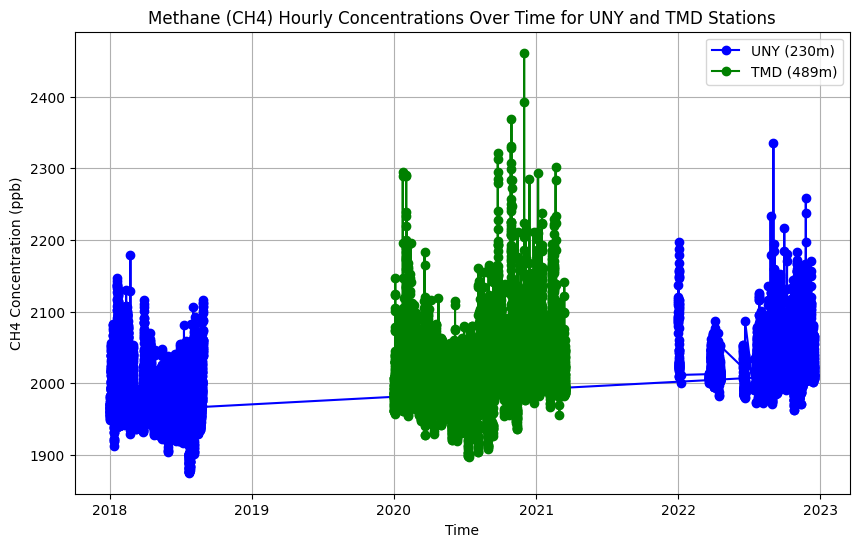

In [6]:
# Fetch data for UNY (elevation 230) and TMD (elevation 489), using limit=10000
#ch4/co2 select the ghg 
uny_data = get_station_data_csv('uny', 'ch4', 'hourly', 483, limit=10000)
tmd_data = get_station_data_csv('tmd', 'ch4', 'hourly', 561, limit=10000)

# Check if data was successfully retrieved before proceeding
if uny_data.empty or tmd_data.empty:
    print("No data available for one or both stations. Exiting.")
else:
    # Convert the 'datetime' column to datetime for plotting
    uny_data['datetime'] = pd.to_datetime(uny_data['datetime'], format='%Y-%m-%dT%H:%M:%SZ')
    tmd_data['datetime'] = pd.to_datetime(tmd_data['datetime'], format='%Y-%m-%dT%H:%M:%SZ')

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(uny_data['datetime'], uny_data['value'], label='UNY (230m)', color='blue', marker='o')
    plt.plot(tmd_data['datetime'], tmd_data['value'], label='TMD (489m)', color='green', marker='o')

    plt.title('Methane (CH4) Hourly Concentrations Over Time for UNY and TMD Stations')
    plt.xlabel('Time')
    plt.ylabel('CH4 Concentration (ppb)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()